In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Imagen 3 Image Editing

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fvision%2Fgetting-started%2Fimagen3_editing.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/vision/getting-started/imagen3_editing.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| Author |
| --- |
| [Katie Nguyen](https://github.com/katiemn) |

## Overview

### Imagen 3

Imagen 3 on Vertex AI brings Google's state of the art generative AI capabilities to application developers. Imagen 3 is Google's highest quality text-to-image model to date. It's capable of creating images with astonishing detail. Thus, developers have more control when building next-generation AI products that transform their imagination into high quality visual assets. Learn more about [Imagen on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/image/overview).


In this tutorial, you will learn how to use the Google Gen AI SDK for Python to interact with Imagen 3 and modify existing images with mask-based editing and mask-free editing in the following modes:

- Inpainting
- Product background editing
- Outpainting
- Mask-free

## Get started


### Install Google Gen AI SDK for Python


In [1]:
%pip install --upgrade --quiet google-genai

Note: you may need to restart the kernel to use updated packages.


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.


In [2]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Import libraries

In [2]:
from google import genai
from google.genai.types import (
    EditImageConfig,
    GenerateImagesConfig,
    Image,
    MaskReferenceConfig,
    MaskReferenceImage,
    RawReferenceImage,
)

### Set Google Cloud project information and create client
To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [5]:
import os

PROJECT_ID = "[your-project-id]"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

In [4]:
import os
print(os.environ.get("GOOGLE_CLOUD_PROJECT"))

qwiklabs-gcp-01-013492f80d4a


### Define helper functions

In [6]:
import io
import urllib

from PIL import Image as PIL_Image
import matplotlib.pyplot as plt


# Gets the image bytes from a PIL Image object.
def get_bytes_from_pil(image: PIL_Image) -> bytes:
    byte_io_png = io.BytesIO()
    image.save(byte_io_png, "PNG")
    return byte_io_png.getvalue()


# Pads an image for outpainting.
def pad_to_target_size(
    source_image,
    target_size=(1536, 1536),
    mode="RGB",
    vertical_offset_ratio=0,
    horizontal_offset_ratio=0,
    fill_val=255,
):
    orig_image_size_w, orig_image_size_h = source_image.size
    target_size_w, target_size_h = target_size

    insert_pt_x = (target_size_w - orig_image_size_w) // 2 + int(
        horizontal_offset_ratio * target_size_w
    )
    insert_pt_y = (target_size_h - orig_image_size_h) // 2 + int(
        vertical_offset_ratio * target_size_h
    )
    insert_pt_x = min(insert_pt_x, target_size_w - orig_image_size_w)
    insert_pt_y = min(insert_pt_y, target_size_h - orig_image_size_h)

    if mode == "RGB":
        source_image_padded = PIL_Image.new(
            mode, target_size, color=(fill_val, fill_val, fill_val)
        )
    elif mode == "L":
        source_image_padded = PIL_Image.new(mode, target_size, color=(fill_val))
    else:
        raise ValueError("source image mode must be RGB or L.")

    source_image_padded.paste(source_image, (insert_pt_x, insert_pt_y))
    return source_image_padded


# Pads and resizes image and mask to the same target size.
def pad_image_and_mask(
    image_vertex: PIL_Image,
    mask_vertex: PIL_Image,
    target_size,
    vertical_offset_ratio,
    horizontal_offset_ratio,
):
    image_vertex.thumbnail(target_size)
    mask_vertex.thumbnail(target_size)

    image_vertex = pad_to_target_size(
        image_vertex,
        target_size=target_size,
        mode="RGB",
        vertical_offset_ratio=vertical_offset_ratio,
        horizontal_offset_ratio=horizontal_offset_ratio,
        fill_val=0,
    )
    mask_vertex = pad_to_target_size(
        mask_vertex,
        target_size=target_size,
        mode="L",
        vertical_offset_ratio=vertical_offset_ratio,
        horizontal_offset_ratio=horizontal_offset_ratio,
        fill_val=255,
    )
    return image_vertex, mask_vertex


def display_images(original_image, modified_image) -> None:
    fig, axis = plt.subplots(1, 2, figsize=(12, 6))
    axis[0].imshow(original_image)
    axis[0].set_title("Original Image")
    axis[1].imshow(modified_image)
    axis[1].set_title("Edited Image")
    for ax in axis:
        ax.axis("off")
    plt.show()

### Load the image models

Imagen 3 Generation: `imagen-3.0-generate-002`

Imagen 3 Editing: `imagen-3.0-capability-001`

In [7]:
generation_model = "imagen-3.0-generate-002"

edit_model = "imagen-3.0-capability-001"

### Inpainting insert

In these examples you will specify a targeted area to apply edits to. In the case of inpainting insert, you'll use a mask area to add image content to an existing image. Start by generating an image using Imagen 3. Then create two ```ReferenceImage``` objects, one for your reference image and one for your mask. For the ```MaskReferenceImage``` set ```reference_image=None```, this will allow for automatic mask detection based on the specified ```mask_mode```.

When generating images you can also set the `safety_filter_level` and `person_generation` parameters accordingly:
* `person_generation`: DONT_ALLOW, ALLOW_ADULT, ALLOW_ALL
* `safety_filter_level`: BLOCK_LOW_AND_ABOVE, BLOCK_MEDIUM_AND_ABOVE, BLOCK_ONLY_HIGH, BLOCK_NONE

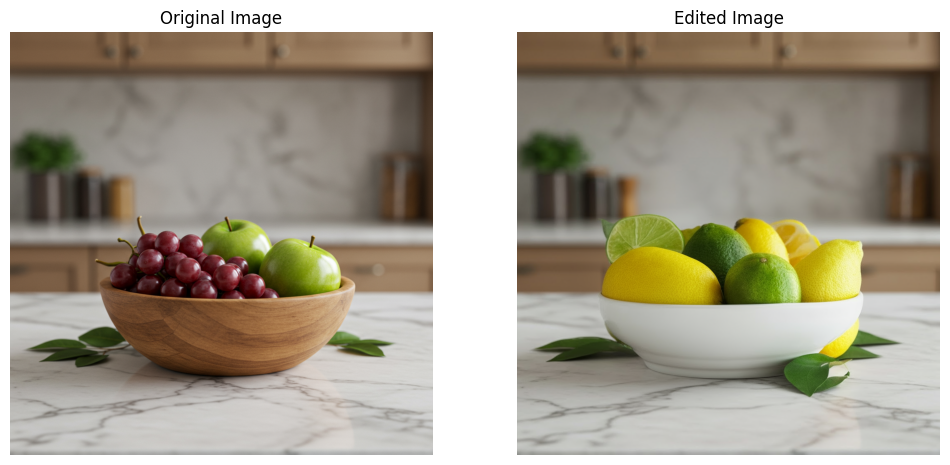

In [11]:
image_prompt = """
a small wooden bowl with grapes and apples on a marble kitchen counter, light brown cabinets blurred in the background
"""
generated_image = client.models.generate_images(
    model=generation_model,
    prompt=image_prompt,
    config=GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

edit_prompt = "a small white ceramic bowl with lemons and limes, make limes size 50% smaller than lemons' size"
raw_ref_image = RawReferenceImage(
    reference_image=generated_image.generated_images[0].image, reference_id=0
)
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    reference_image=None,
    config=MaskReferenceConfig(
        mask_mode="MASK_MODE_FOREGROUND",
        mask_dilation=0.1,
    ),
)
edited_image = client.models.edit_image(
    model=edit_model,
    prompt=edit_prompt,
    reference_images=[raw_ref_image, mask_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_INPAINT_INSERTION",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

display_images(
    generated_image.generated_images[0].image._pil_image,
    edited_image.generated_images[0].image._pil_image,
)

This next example demonstrates another instance of inpainting insert. However, you'll use the semantic mask mode. When using this mask mode, you'll need to specify the class ID of the object in the image that you wish to mask and replace. A list of possible instance types is shown at the end of this notebook. Once you've found the correct segmentation class ID, list it in ```segmentation_classes```.

Within the ```MaskReferenceImage``` object you can also configure the dilation value. This float between 0 and 1 represents the percentage of the provided mask.

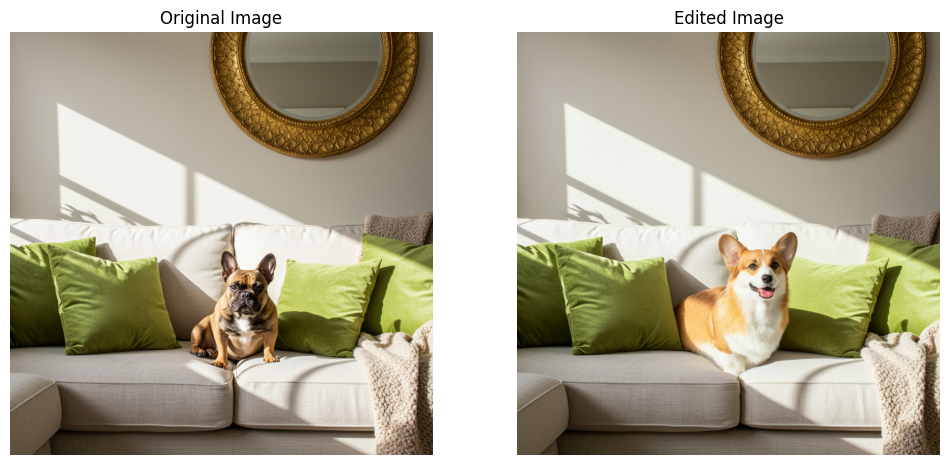

In [12]:
image_prompt = """
a french bulldog sitting in a living room on a couch with green throw pillows and a throw blanket,
a circular mirror is on the wall above the couch
"""
generated_image = client.models.generate_images(
    model=generation_model,
    prompt=image_prompt,
    config=GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

edit_prompt = "a corgi sitting on a couch"
raw_ref_image = RawReferenceImage(
    reference_image=generated_image.generated_images[0].image, reference_id=0
)
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    reference_image=None,
    config=MaskReferenceConfig(
        mask_mode="MASK_MODE_SEMANTIC",
        segmentation_classes=[8],
        mask_dilation=0.1,
    ),
)
edited_image = client.models.edit_image(
    model=edit_model,
    prompt=edit_prompt,
    reference_images=[raw_ref_image, mask_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_INPAINT_INSERTION",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

display_images(
    generated_image.generated_images[0].image._pil_image,
    edited_image.generated_images[0].image._pil_image,
)

Below you'll see another instance of inpainting insert. This time you'll use a local image and mask that have been downloaded from Google Cloud Storage. When using your own mask, you'll specify "MASK_MODE_USER_PROVIDED" as the ```mask_mode```.

Copying gs://cloud-samples-data/generative-ai/image/image-dog.png...
/ [1 files][  1.4 MiB/  1.4 MiB]                                                
Operation completed over 1 objects/1.4 MiB.                                      
Copying gs://cloud-samples-data/generative-ai/image/image-dog-mask.png...
/ [1 files][  4.0 KiB/  4.0 KiB]                                                
Operation completed over 1 objects/4.0 KiB.                                      


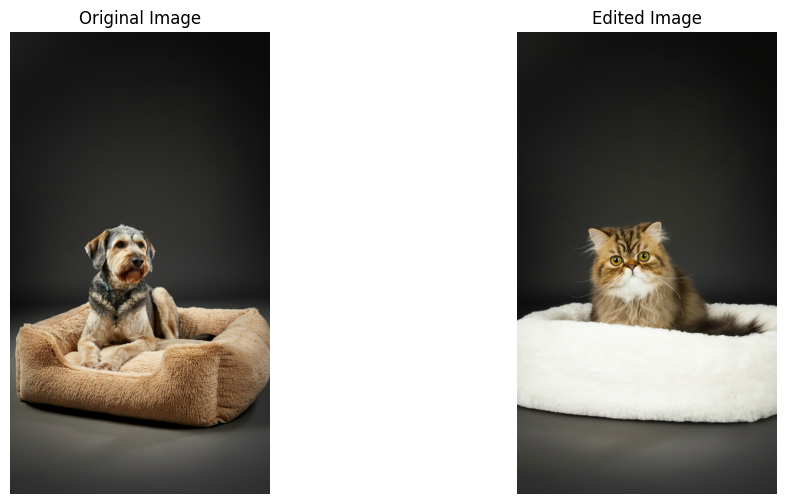

In [13]:
! gsutil cp "gs://cloud-samples-data/generative-ai/image/image-dog.png" .
! gsutil cp "gs://cloud-samples-data/generative-ai/image/image-dog-mask.png" .
initial_image = Image.from_file(location="image-dog.png")
initial_image_mask = Image.from_file(location="image-dog-mask.png")

edit_prompt = "a Persian cat sitting in a white cat bed"
raw_ref_image = RawReferenceImage(reference_image=initial_image, reference_id=0)
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    reference_image=initial_image_mask,
    config=MaskReferenceConfig(
        mask_mode="MASK_MODE_USER_PROVIDED",
        mask_dilation=0.1,
    ),
)

edited_image = client.models.edit_image(
    model=edit_model,
    prompt=edit_prompt,
    reference_images=[raw_ref_image, mask_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_INPAINT_INSERTION",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

display_images(
    initial_image._pil_image, edited_image.generated_images[0].image._pil_image
)

### Inpainting remove

Inpainting remove allows you to use a mask area to remove image content.

In this next example, you'll take an image in Google Cloud Storage of a wall with a mirror and some photos and create a mask over detected mirror instances. You'll then remove this object by setting the edit mode to "EDIT_MODE_INPAINT_REMOVAL." For these types of requests the prompt can be an empty string.

Copying gs://cloud-samples-data/generative-ai/image/mirror.png...
/ [1 files][  1.2 MiB/  1.2 MiB]                                                
Operation completed over 1 objects/1.2 MiB.                                      


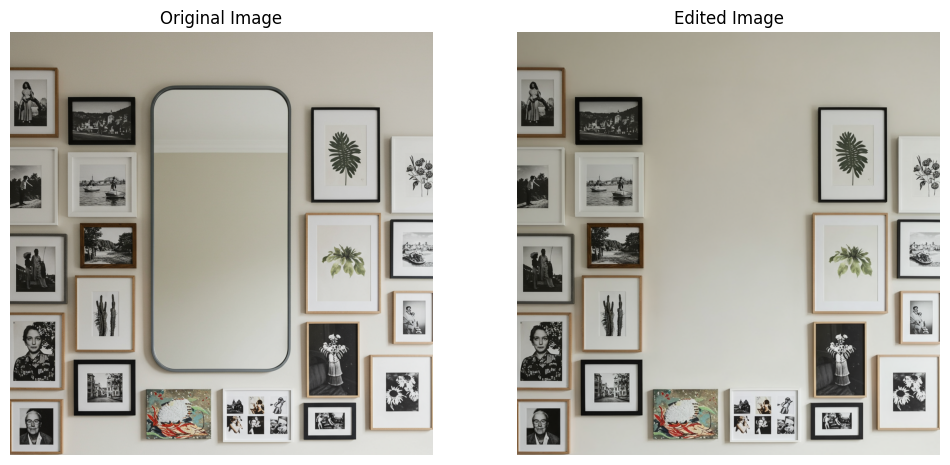

In [14]:
! gsutil cp "gs://cloud-samples-data/generative-ai/image/mirror.png" .

starting_image = Image(gcs_uri="gs://cloud-samples-data/generative-ai/image/mirror.png")
raw_ref_image = RawReferenceImage(reference_image=starting_image, reference_id=0)
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    reference_image=None,
    config=MaskReferenceConfig(
        mask_mode="MASK_MODE_SEMANTIC", segmentation_classes=[85]
    ),
)

remove_image = client.models.edit_image(
    model=edit_model,
    prompt="",
    reference_images=[raw_ref_image, mask_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_INPAINT_REMOVAL",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

starting_image_show = PIL_Image.open(
    urllib.request.urlopen(
        "https://storage.googleapis.com/cloud-samples-data/generative-ai/image/mirror.png"
    )
)

display_images(
    starting_image_show,
    remove_image.generated_images[0].image._pil_image,
)

### Product background editing via background swap mode


You can also use Imagen 3 for product image editing. By setting `edit_mode` to "EDIT_MODE_BGSWAP", you can maintain the product content while modifying the image background.

For this example, start with an image stored in a Google Cloud Storage bucket, and provide a prompt describing the new background scene.  

Copying gs://cloud-samples-data/generative-ai/image/suitcase.png...
/ [1 files][  1.2 MiB/  1.2 MiB]                                                
Operation completed over 1 objects/1.2 MiB.                                      


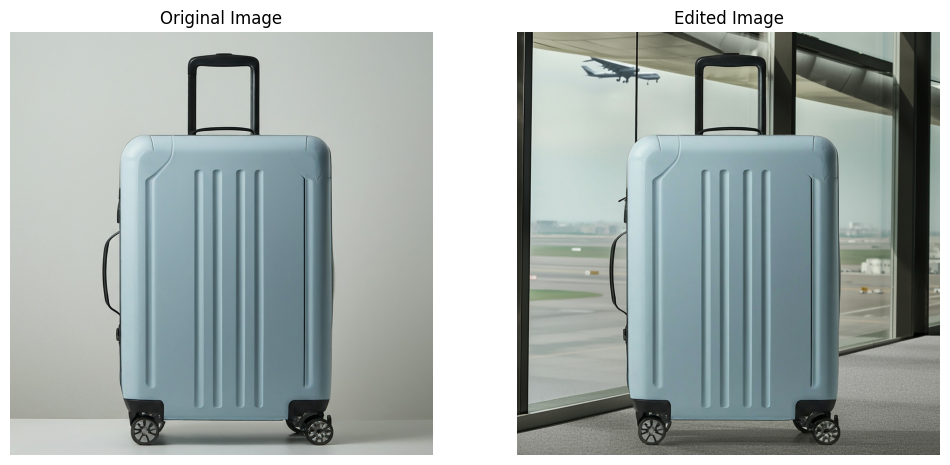

In [18]:
! gsutil cp gs://cloud-samples-data/generative-ai/image/suitcase.png .

product_image = Image(
    gcs_uri="gs://cloud-samples-data/generative-ai/image/suitcase.png"
)
raw_ref_image = RawReferenceImage(reference_image=product_image, reference_id=0)
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    reference_image=None,
    config=MaskReferenceConfig(mask_mode="MASK_MODE_BACKGROUND"),
)

prompt = "a light blue suitcase in front of a window in an airport, lots of bright, natural lighting coming in from the windows, plane taking off in the distance"
edited_image = client.models.edit_image(
    model=edit_model,
    prompt=prompt,
    reference_images=[raw_ref_image, mask_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_BGSWAP",
        number_of_images=1,
        seed=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

product_image_show = PIL_Image.open(
    urllib.request.urlopen(
        "https://storage.googleapis.com/cloud-samples-data/generative-ai/image/suitcase.png"
    )
)
display_images(product_image_show, edited_image.generated_images[0].image._pil_image)

### Outpainting

Imagen 3 editing can be used for image outpainting. Outpainting is used to expand the content of an image to a larger area or area with different dimensions. To use the outpainting feature, you must create an image mask and prepare the original image by padding some empty space around it. Once you've padded the image, you can use the ```outpainting``` editing mode to fill in the empty space.

Copying gs://cloud-samples-data/generative-ai/image/living-room.png...
/ [1 files][  3.2 MiB/  3.2 MiB]                                                
Operation completed over 1 objects/3.2 MiB.                                      


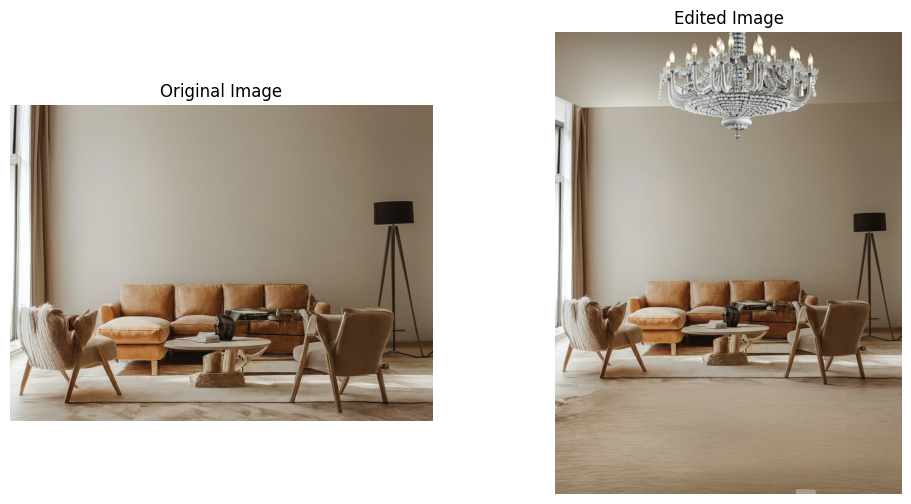

In [23]:
! gsutil cp "gs://cloud-samples-data/generative-ai/image/living-room.png" .

initial_image = Image.from_file(location="living-room.png")
mask = PIL_Image.new("L", initial_image._pil_image.size, 0)

target_size_w = int(2500 * eval("3/4"))
target_size = (target_size_w, 2500)
image_pil_outpaint, mask_pil_outpaint = pad_image_and_mask(
    initial_image._pil_image,
    mask,
    target_size,
    0,
    0,
)
image_pil_outpaint_image = Image(image_bytes=get_bytes_from_pil(image_pil_outpaint))
mask_pil_outpaint_image = Image(image_bytes=get_bytes_from_pil(mask_pil_outpaint))

raw_ref_image = RawReferenceImage(
    reference_image=image_pil_outpaint_image, reference_id=0
)
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    reference_image=mask_pil_outpaint_image,
    config=MaskReferenceConfig(
        mask_mode="MASK_MODE_USER_PROVIDED",
        mask_dilation=0.03,  # (!)
    ),
)

prompt = "a chandelier hanging from the ceiling"
edited_image = client.models.edit_image(
    model=edit_model,
    prompt=prompt,
    reference_images=[raw_ref_image, mask_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_OUTPAINT",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

display_images(
    initial_image._pil_image, edited_image.generated_images[0].image._pil_image
)

### Mask-free editing

Imagen 3 editing also lets you edit images without a mask. Simply write the changes you wish to make to the image in the prompt and provide the original image as the sole reference image.

Copying gs://cloud-samples-data/generative-ai/image/latte.jpg...
/ [1 files][ 72.5 KiB/ 72.5 KiB]                                                
Operation completed over 1 objects/72.5 KiB.                                     


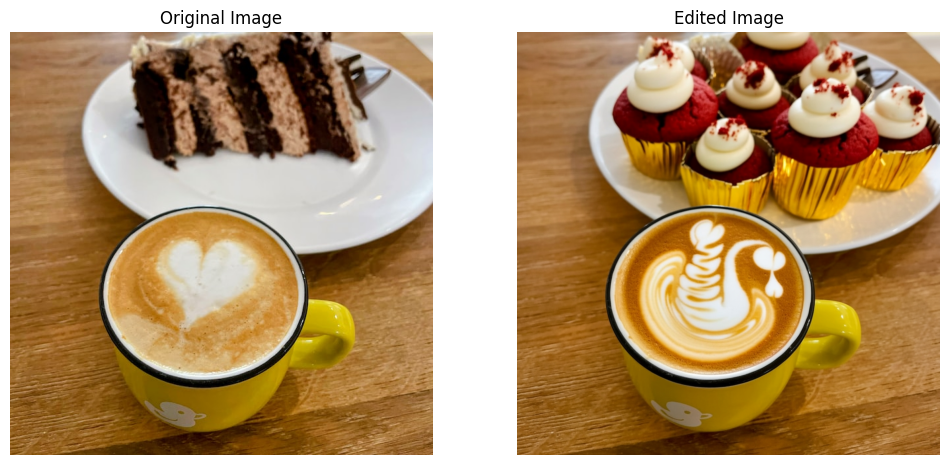

In [24]:
! gsutil cp gs://cloud-samples-data/generative-ai/image/latte.jpg .

original_image = Image(gcs_uri="gs://cloud-samples-data/generative-ai/image/latte.jpg")
raw_ref_image = RawReferenceImage(reference_image=original_image, reference_id=0)


prompt = "swan latte art in the coffee cup and an assortment of red velvet cupcakes in gold wrappers on the white plate"
edited_image = client.models.edit_image(
    model=edit_model,
    prompt=prompt,
    reference_images=[raw_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_DEFAULT",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

original_image_show = PIL_Image.open(
    urllib.request.urlopen(
        "https://storage.googleapis.com/cloud-samples-data/generative-ai/image/latte.jpg"
    )
)
display_images(original_image_show, edited_image.generated_images[0].image._pil_image)

### Semantic segmentation classes

| Class ID | Instance Type | Class ID | Instance Type | Class ID | Instance Type | Class ID | Instance Type |
| --- | --- | --- | --- | --- | --- | --- | --- |
| 0 | backpack | 50 | carrot | 100 | sidewalk_pavement | 150 | skis |
| 1 | umbrella | 51 | hot_dog | 101 | runway | 151 | snowboard |
| 2 | bag | 52 | pizza | 102 | terrain | 152 | sports_ball |
| 3 | tie | 53 | donut | 103 | book | 153 | kite |
| 4 | suitcase | 54 | cake | 104 | box | 154 | baseball_bat |
| 5 | case | 55 | fruit_other | 105 | clock | 155 | baseball_glove |
| 6 | bird | 56 | food_other | 106 | vase | 156 | skateboard |
| 7 | cat | 57 | chair_other | 107 | scissors | 157 | surfboard |
| 8 | dog | 58 | armchair | 108 | plaything_other | 158 | tennis_racket |
| 9 | horse | 59 | swivel_chair | 109 | teddy_bear | 159 | net |
| 10 | sheep | 60 | stool | 110 | hair_dryer | 160 | base |
| 11 | cow | 61 | seat | 111 | toothbrush | 161 | sculpture |
| 12 | elephant | 62 | couch | 112 | painting | 162 | column |
| 13 | bear | 63 | trash_can | 113 | poster | 163 | fountain |
| 14 | zebra | 64 | potted_plant | 114 | bulletin_board | 164 | awning |
| 15 | giraffe | 65 | nightstand | 115 | bottle | 165 | apparel |
| 16 | animal_other | 66 | bed | 116 | cup | 166 | banner |
| 17 | microwave | 67 | table | 117 | wine_glass | 167 | flag |
| 18 | radiator | 68 | pool_table | 118 | knife | 168 | blanket |
| 19 | oven | 69 | barrel | 119 | fork | 169 | curtain_other |
| 20 | toaster | 70 | desk | 120 | spoon | 170 | shower_curtain |
| 21 | storage_tank | 71 | ottoman | 121 | bowl | 171 | pillow |
| 22 | conveyor_belt | 72 | wardrobe | 122 | tray | 172 | towel |
| 23 | sink | 73 | crib | 123 | range_hood | 173 | rug_floormat |
| 24 | refrigerator | 74 | basket | 124 | plate | 174 | vegetation |
| 25 | washer_dryer | 75 | chest_of_drawers | 125 | person | 175 | bicycle |
| 26 | fan | 76 | bookshelf | 126 | rider_other | 176 | car |
| 27 | dishwasher | 77 | counter_other | 127 | bicyclist | 177 | autorickshaw |
| 28 | toilet | 78 | bathroom_counter | 128 | motorcyclist | 178 | motorcycle |
| 29 | bathtub | 79 | kitchen_island | 129 | paper | 179 | airplane |
| 30 | shower | 80 | door | 130 | streetlight | 180 | bus |
| 31 | tunnel | 81 | light_other | 131 | road_barrier | 181 | train |
| 32 | bridge | 82 | lamp | 132 | mailbox | 182 | truck |
| 33 | pier_wharf | 83 | sconce | 133 | cctv_camera | 183 | trailer |
| 34 | tent | 84 | chandelier | 134 | junction_box | 184 | boat_ship |
| 35 | building | 85 | mirror | 135 | traffic_sign | 185 | slow_wheeled_object |
| 36 | ceiling | 86 | whiteboard | 136 | traffic_light | 186 | river_lake |
| 37 | laptop | 87 | shelf | 137 | fire_hydrant | 187 | sea |
| 38 | keyboard | 88 | stairs | 138 | parking_meter | 188 | water_other |
| 39 | mouse | 89 | escalator | 139 | bench | 189 | swimming_pool |
| 40 | remote | 90 | cabinet | 140 | bike_rack | 190 | waterfall |
| 41 | cell phone | 91 | fireplace | 141 | billboard | 191 | wall |
| 42 | television | 92 | stove | 142 | sky | 192 | window |
| 43 | floor | 93 | arcade_machine | 143 | pole | 193 | window_blind |
| 44 | stage | 94 | gravel | 144 | fence | | |
| 45 | banana | 95 | platform | 145 | railing_banister | | |
| 46 | apple | 96 | playingfield | 146 | guard_rail | | |
| 47 | sandwich | 97 | railroad | 147 | mountain_hill | | |
| 48 | orange | 98 | road | 148 | rock | | |
| 49 | broccoli | 99 | snow | 149 | frisbee | | |
